> # K Means Clustering

## Import the libraries and read the dataset

In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Admin\Desktop\Cs\MLT\Datasource\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Store the data in array format

In [2]:
data = data.iloc[:,3:].values

In [3]:
data[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

## Apply KMeans Clustering by finding the number of clusters

In [3]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(data)
    wcss.append(km.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


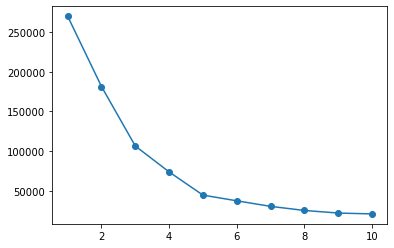

In [4]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss,marker='o')

In [5]:
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(data)

In [7]:
y_km[:5]

array([4, 3, 4, 3, 4])

## Plot

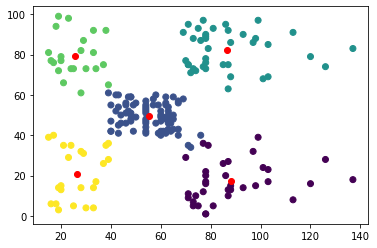

In [10]:
plt.scatter(data[:,0],data[:,1],c=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='r')

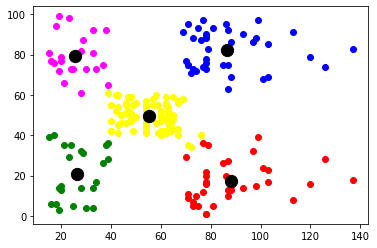

In [8]:
plt.scatter(data[y_km==0,0], data[y_km==0,1], c='red')
plt.scatter(data[y_km==1,0], data[y_km==1,1], c='yellow')
plt.scatter(data[y_km==2,0], data[y_km==2,1], c='blue')
plt.scatter(data[y_km==3,0], data[y_km==3,1], c='magenta')
plt.scatter(data[y_km==4,0], data[y_km==4,1], c='green')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],c='black', s=150)

In [19]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\Cs\MLT\Datasource\Mall_Customers.csv')
x = data.iloc[:,2:].values

In [20]:
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [21]:
model = KMeans(n_clusters = 5)
y_clusters = model.fit_predict(x)

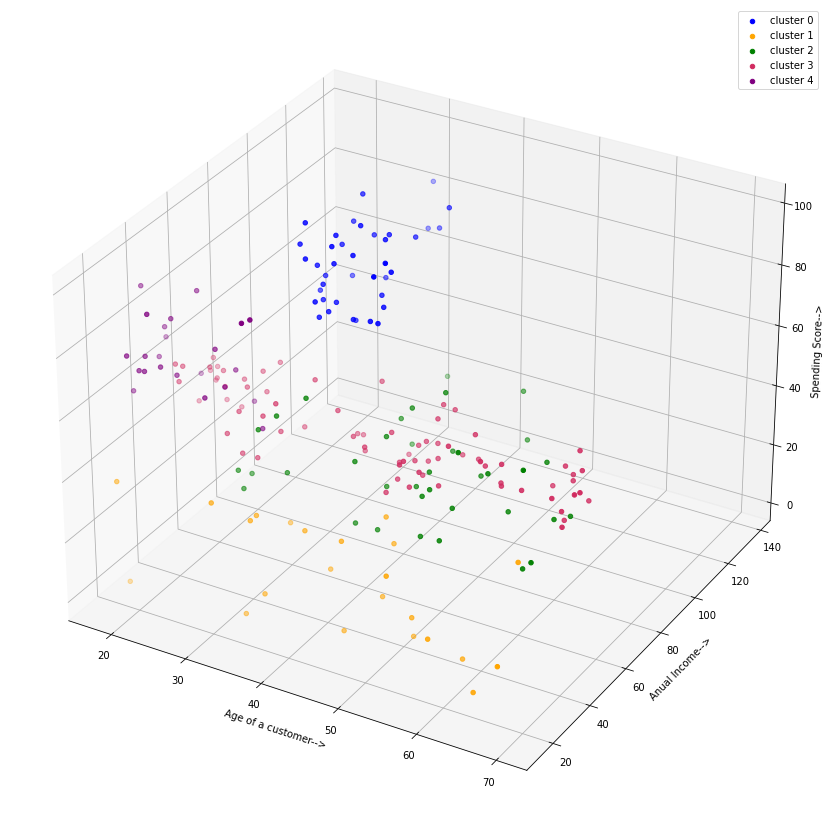

In [15]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], color = 'purple', label = "cluster 4")
ax.set_xlabel('Age of a customer-->')
ax.set_ylabel('Anual Income-->')
ax.set_zlabel('Spending Score-->')
ax.legend()
plt.show()

In [ ]:
"""
import plotly.graph_objs as go
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Age -->'),yaxis = dict(title  = 'Spending Score--->'),
             zaxis = dict(title  = 'Annual Income-->'))

# model.labels_ is the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',
                     marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
"""

> # KMeans - From Scratch

In [351]:
import numpy as np
from sklearn.datasets import make_blobs

In [352]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [353]:
x,y = make_blobs()

In [354]:
x[:3]

array([[ 9.54254438, -3.59433051],
       [ 8.55128097, -9.68515598],
       [ 9.44050943, -2.55700108]])

In [355]:
y[:3]

array([1, 0, 1])

In [356]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


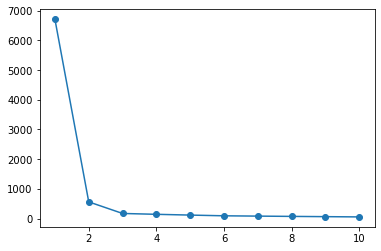

In [357]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss,marker='o')

In [358]:
from scipy.spatial.distance import cdist

def kmeans(x, n_clusters, max_iter=100):
    centroids = x[np.random.choice(len(x), n_clusters, replace=False)]
    print("Initial centroids : ",centroids)
    
    for i in range(max_iter):
        distances = cdist(x, centroids)
        labels = np.argmin(distances, axis=1)
        
        old_centroids = centroids
        centroids = np.array([x[labels == j].mean(axis=0) for j in range(n_clusters)])
        
        if np.allclose(old_centroids, centroids):
            break
           
    print("Final centroids : ",centroids)
    print("Cluster labels : ",labels)

    # plot the data points and their cluster assignments
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(x[:, 0], x[:, 1], c=labels)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='o',color='r')
    legend = ax.legend(*sc.legend_elements(), loc="upper right", title="Clusters")
    ax.add_artist(legend)
    plt.show()

Initial centroids :  [[ 6.34254613  8.17447009]
 [ 8.66399717 -2.84062792]
 [ 9.61462919 -4.9272652 ]]
Final centroids :  [[ 4.65731492  9.34185355]
 [ 9.69737175 -4.14829759]
 [ 9.08697655 -8.94049202]]
Cluster labels :  [1 2 1 1 2 0 1 1 1 1 1 0 2 1 0 1 0 1 0 2 2 0 0 1 0 1 2 0 2 2 0 2 1 2 0 0 1
 1 2 1 0 0 2 0 2 1 1 0 2 0 2 1 2 1 2 0 0 1 1 0 1 0 2 0 0 2 0 1 2 2 2 2 0 2
 2 2 1 1 1 1 1 0 0 2 1 0 0 2 0 2 2 2 1 0 2 2 0 0 2 2]


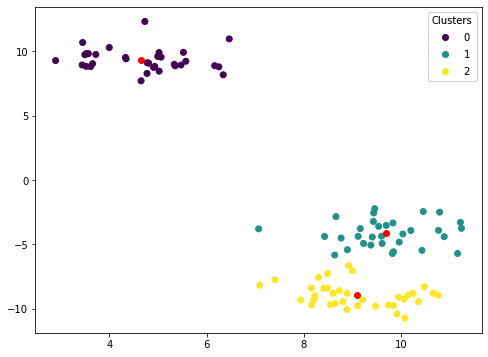

In [363]:
kmeans(x,3)